In [1]:
%load_ext autoreload
%autoreload 2

import fit_schechter as fs
import run_LF as LF

import numpy as np
import os, sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import multiprocessing
import itertools as it

%matplotlib inline

plt.style.use(['default','seaborn','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

/Users/cmason/Documents/Research/Projects/SAO-REU2020/CODE/run_LF.py:38: RuntimeWarning: divide by zero encountered in log10
  log10_lg = np.log10(lum_grid) #log10 luminosity grid in order to plot it on log10 scale similar to past works
/Users/cmason/Documents/Research/Projects/SAO-REU2020/CODE/run_LF.py:38: RuntimeWarning: divide by zero encountered in log10
  log10_lg = np.log10(lum_grid) #log10 luminosity grid in order to plot it on log10 scale similar to past works


# Load Alexa's LF models

In [2]:
LFdict = np.load('../data/allLFvals.npy', allow_pickle=True).item()

In [3]:
z   = np.unique(np.array([k[0] for k in list(LFdict.keys())]))
xHI = np.unique(np.array([k[1] for k in list(LFdict.keys())]))

(38.0, 44.5)

(38.0, 44.5)

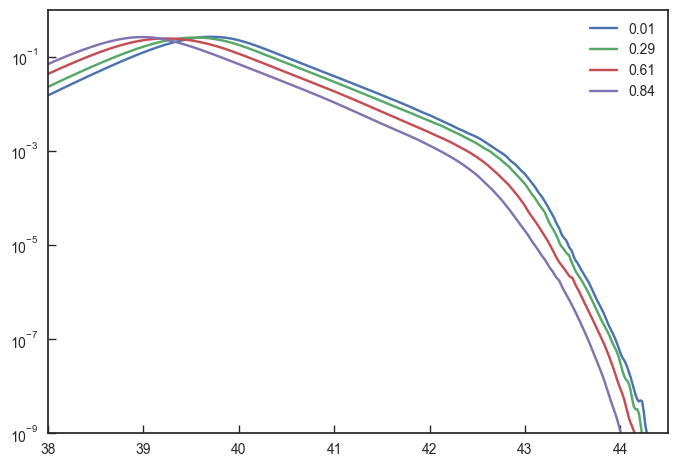

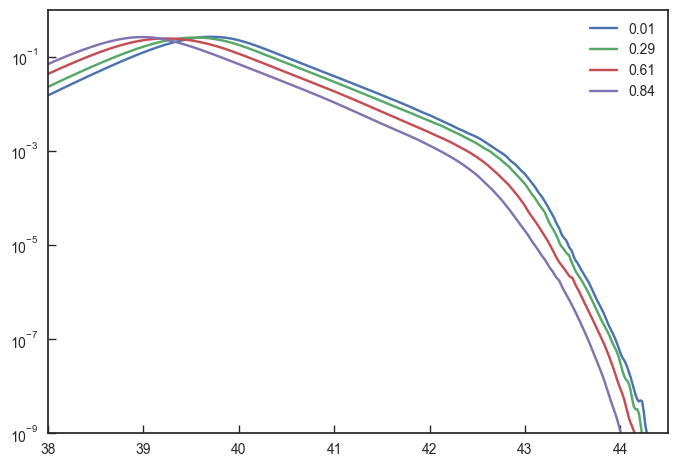

In [4]:
for x in xHI[::10]:
    plt.semilogy(LF.log10_lg, LFdict[(z[2],x)], label=x)

plt.legend()
plt.ylim(1e-9,1)
plt.xlim(38., 44.5)

# Fit LFs

In [39]:
?np.save

In [36]:
def schechter_fit(zval_test, xHI_test, logL_min=41., logL_max=44., 
                  plot=True, plot_chains=False, save=True):
    
    #Call LF function
    log10_LF = LFdict[(zval_test, xHI_test)]
    
    #Emcee Information
    # Run emcee to get posterior samples
    sampler = fs.fit_schechter_emcee(LF.log10_lg[LF.log10_lg > 0.], log10_LF[LF.log10_lg > 0.], 
                                     logL_min=logL_min, logL_max=logL_max)
    
    plotname = f'../data/schechter_runs/logL={logL_min}-{logL_max}_z={zval_test}_xHI={xHI_test}.png'
    
    if plot:
        if plot_chains:
            plt.figure()
            fs.plot_emcee(sampler, plotname=plotname, save=save)                
        
        plt.figure()
        fs.plot_emcee_draws(sampler, LF.log10_lg, log10_LF, 
                            xlim=(logL_min-0.5, logL_max+0.5),
                            plotname=plotname, save=save)
        plt.axvline(logL_min)
        plt.axvline(logL_max)

    medians = fs.get_emcee_medians(sampler)
    
    del sampler
    
    return medians

In [37]:
def input_params(z, xHI, logL_min, logL_max, plot=True, plot_chains=True, save=True):
    for pair in it.product(z, xHI):
        yield (*pair, logL_min, logL_max, plot, plot_chains, save)

In [38]:
with multiprocessing.Pool(processes=3) as pool:
    results = pool.starmap(schechter_fit, input_params(z[:2], xHI[::10], 41., 43.))
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [20]:
print(z[:2])
# print(xHI[::10])

[5.  5.5]
[5.  5.5]


In [21]:
len([x for x in input_params(z[:2], xHI[::10], 41., 43.)])



8

8

In [23]:
res = {}
for i,x in enumerate(input_params(z[:2], xHI[::10], 41., 43.)):
    res[(x[0], x[1])] = results[i]
print(res)
    

{(5.0, 0.01): array([-1.80237733, 43.19697552, -3.51247343]), (5.0, 0.29): array([-1.79028306, 43.07630434, -3.50659919]), (5.0, 0.61): array([-1.7881744 , 42.84374287, -3.51395303]), (5.0, 0.84): array([-1.79851912, 42.66410946, -3.61734836]), (5.5, 0.01): array([-1.82578423, 43.16220141, -3.54354752]), (5.5, 0.29): array([-1.80989628, 43.02134433, -3.51050025]), (5.5, 0.61): array([-1.8181008 , 42.81247766, -3.55610366]), (5.5, 0.84): array([-1.81548767, 42.61875673, -3.63712034])}
{(5.0, 0.01): array([-1.80237733, 43.19697552, -3.51247343]), (5.0, 0.29): array([-1.79028306, 43.07630434, -3.50659919]), (5.0, 0.61): array([-1.7881744 , 42.84374287, -3.51395303]), (5.0, 0.84): array([-1.79851912, 42.66410946, -3.61734836]), (5.5, 0.01): array([-1.82578423, 43.16220141, -3.54354752]), (5.5, 0.29): array([-1.80989628, 43.02134433, -3.51050025]), (5.5, 0.61): array([-1.8181008 , 42.81247766, -3.55610366]), (5.5, 0.84): array([-1.81548767, 42.61875673, -3.63712034])}


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:12<00:00, 77.76it/s]


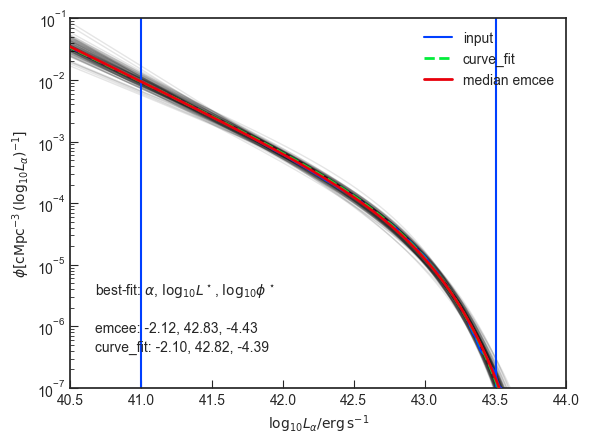

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:13<00:00, 76.45it/s]


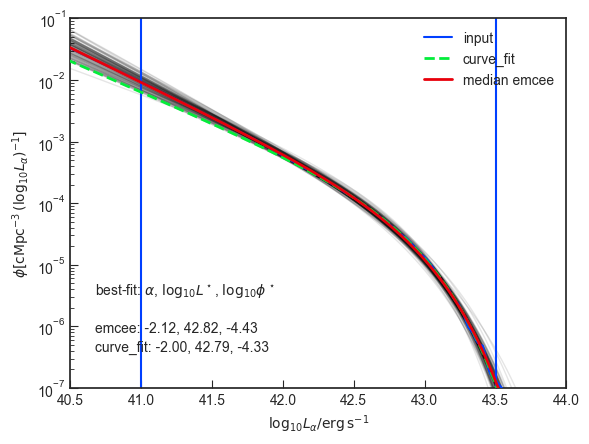

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:12<00:00, 82.74it/s]


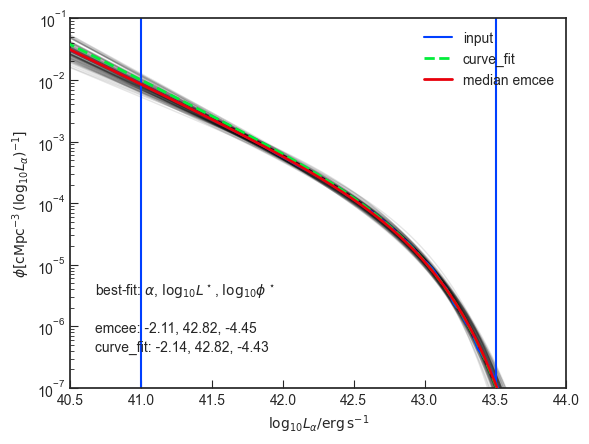

100%|██████████| 1000/1000 [00:11<00:00, 85.53it/s]


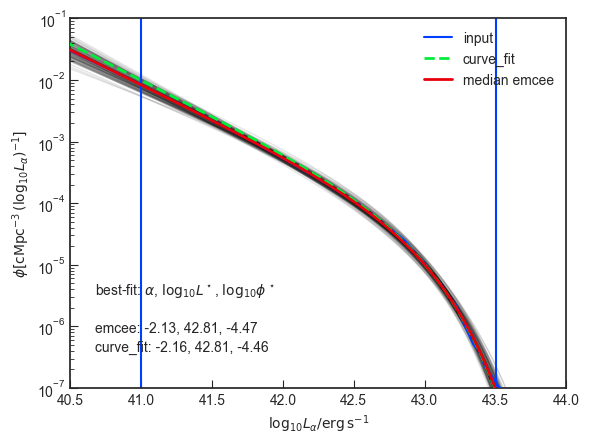

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:12<00:00, 80.98it/s]


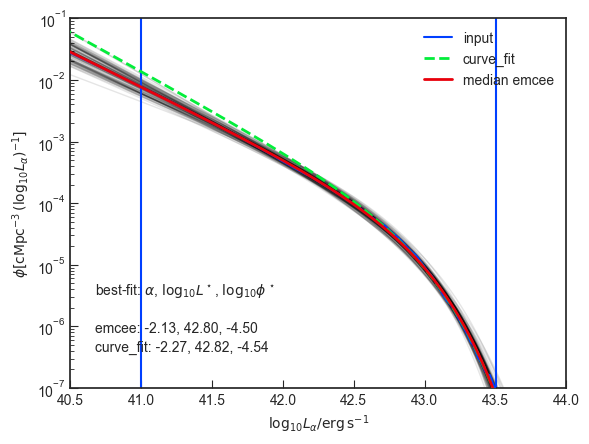

100%|██████████| 1000/1000 [00:12<00:00, 81.79it/s]


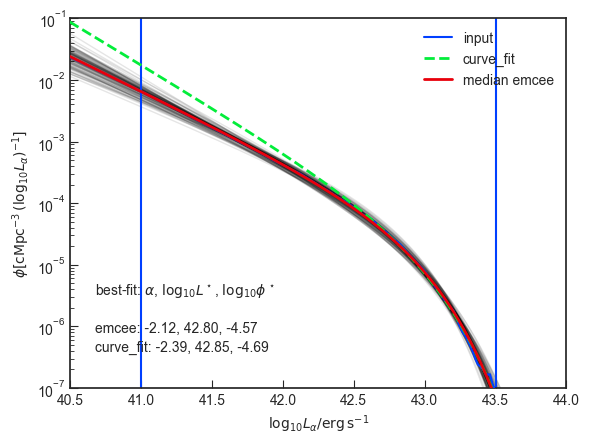

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:13<00:00, 76.17it/s]


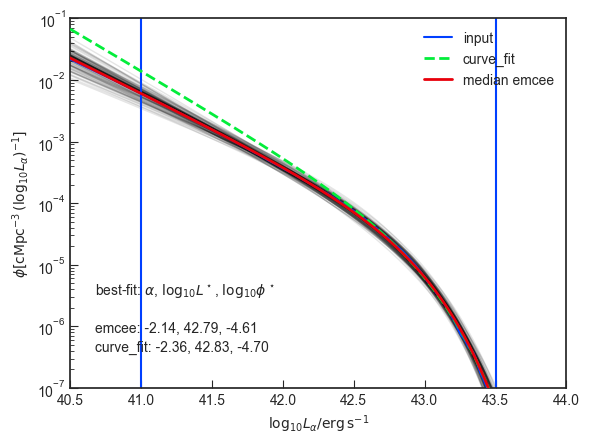

100%|██████████| 1000/1000 [00:12<00:00, 77.68it/s]


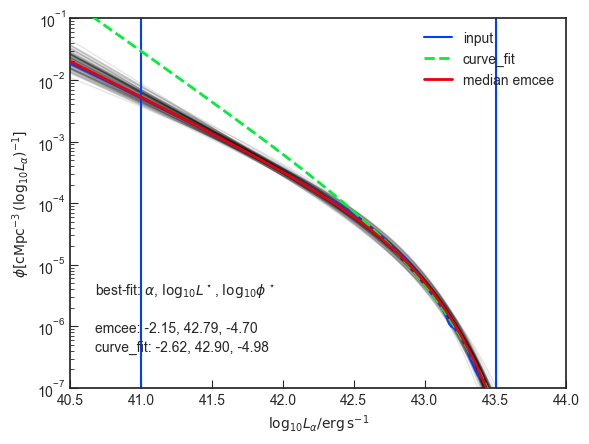

100%|██████████| 1000/1000 [00:13<00:00, 75.17it/s]


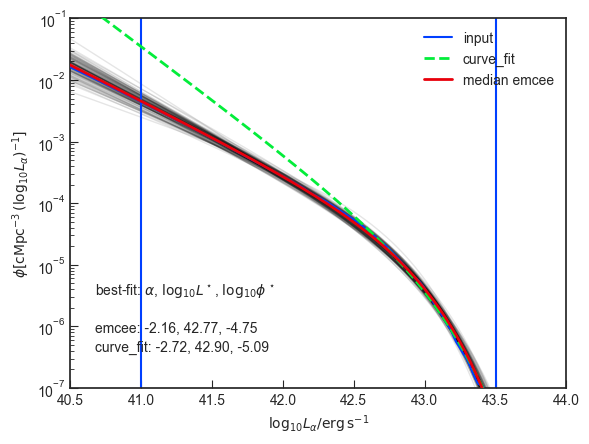

100%|██████████| 1000/1000 [00:12<00:00, 79.50it/s]


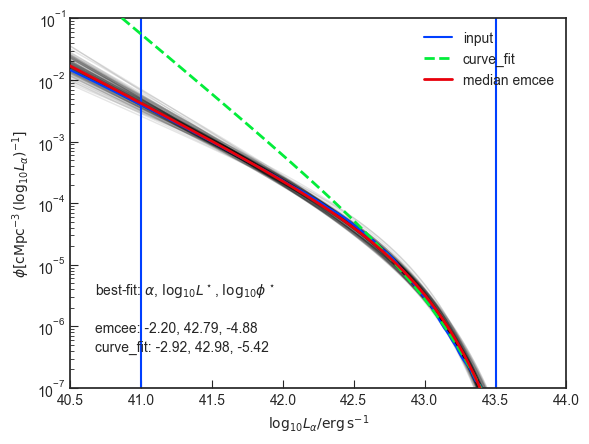

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:13<00:00, 76.85it/s]


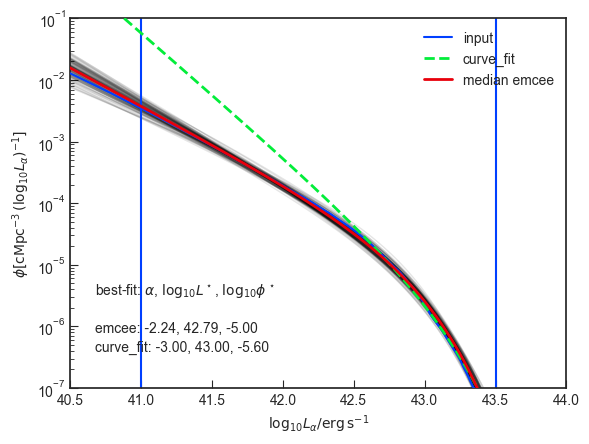

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:22<00:00, 44.25it/s]


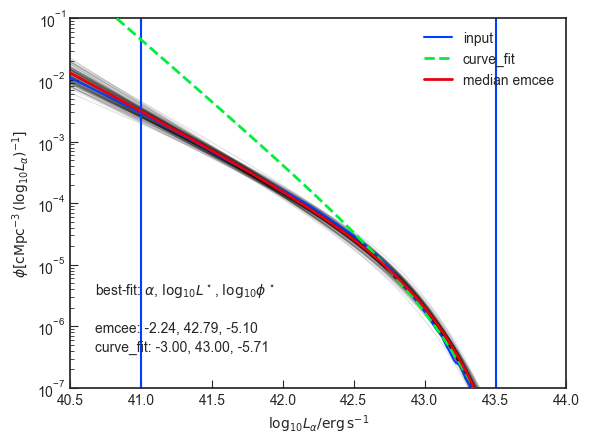

100%|██████████| 1000/1000 [00:23<00:00, 42.08it/s]


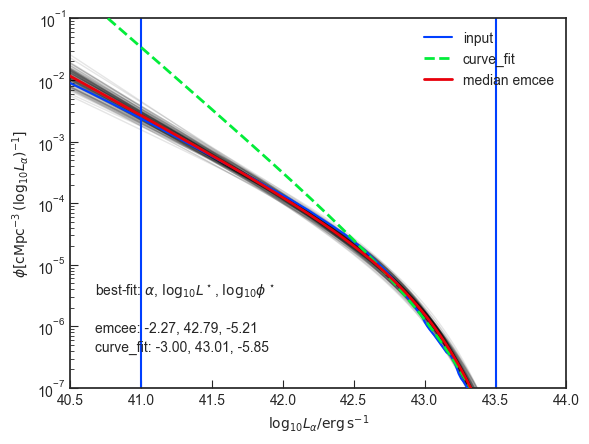

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:41<00:00, 24.25it/s]


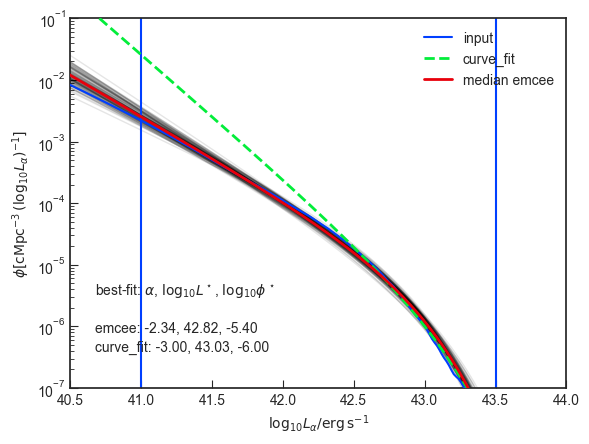

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:28<00:00, 34.75it/s]


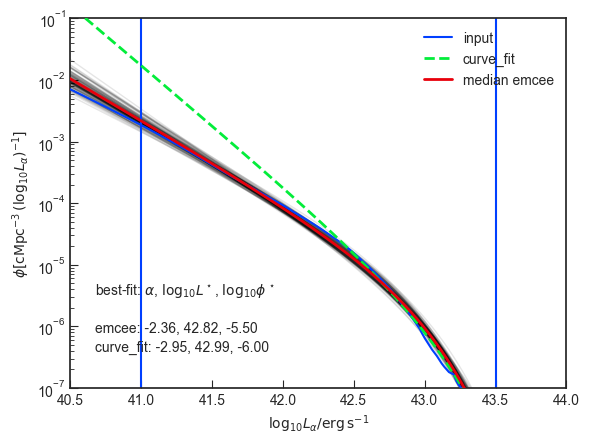

100%|██████████| 1000/1000 [00:32<00:00, 31.14it/s]


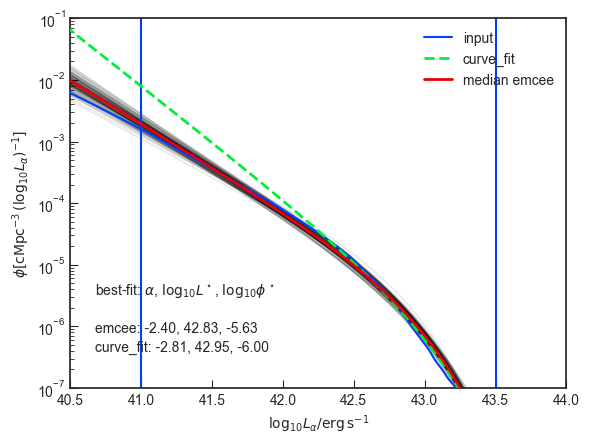

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:39<00:00, 25.38it/s]


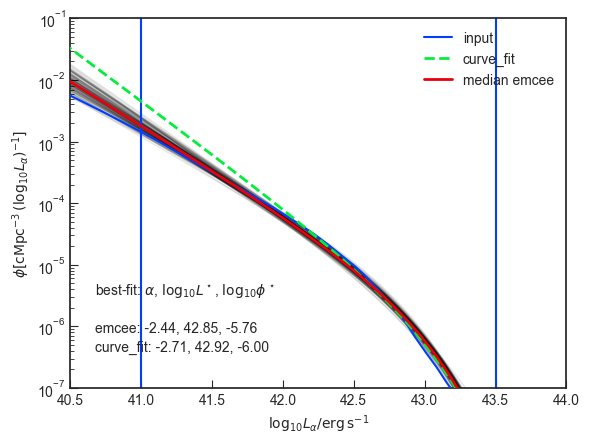

100%|██████████| 1000/1000 [00:18<00:00, 55.49it/s]


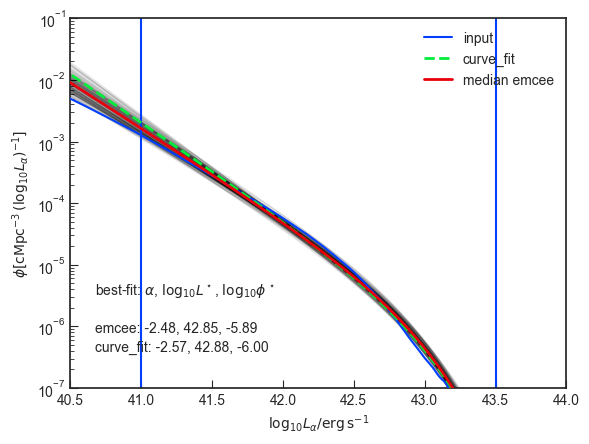

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:15<00:00, 62.55it/s]


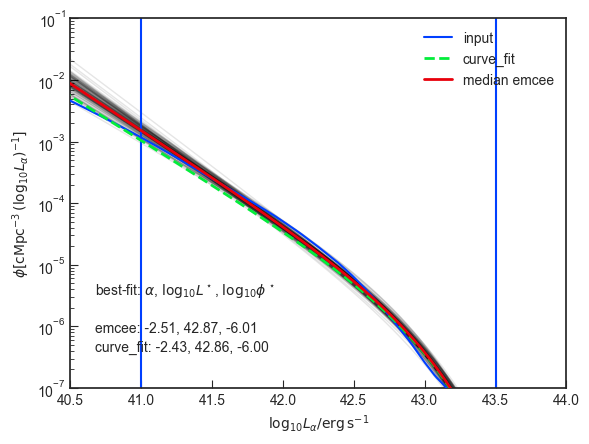

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:13<00:00, 74.92it/s]


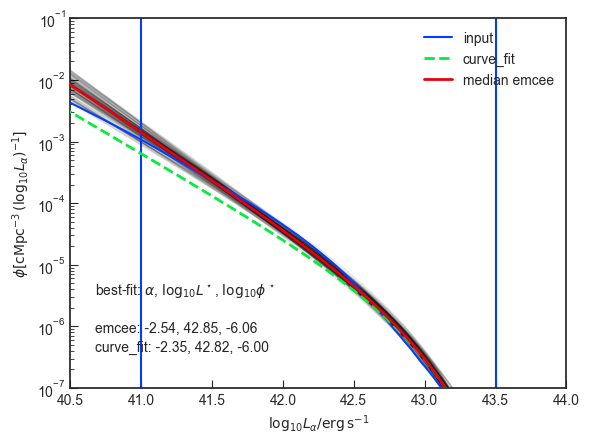

In [72]:
med = []
for x in xHI[::2]:
    med.append(schechter_fit(z[-1], x, logL_min=41., logL_max=43.5, plot=True, plot_chains=False))
    plt.show()

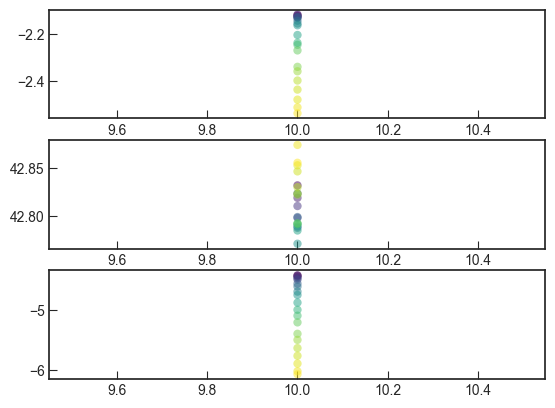

In [81]:
med =np.array(med)
fig, ax = plt.subplots(3,1)
for i in range(3):
#     ax[i].scatter(xHI[::2], med[:,i], c=xHI[::2], cmap='viridis')
    ax[i].scatter(10*np.ones(len(med[:,i])), med[:,i], c=xHI[::2], alpha=0.5, lw=0, cmap='viridis')

## 41 -44

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:14<00:00, 71.19it/s]


array([-1.98574382, 43.0815405 , -3.68540024])

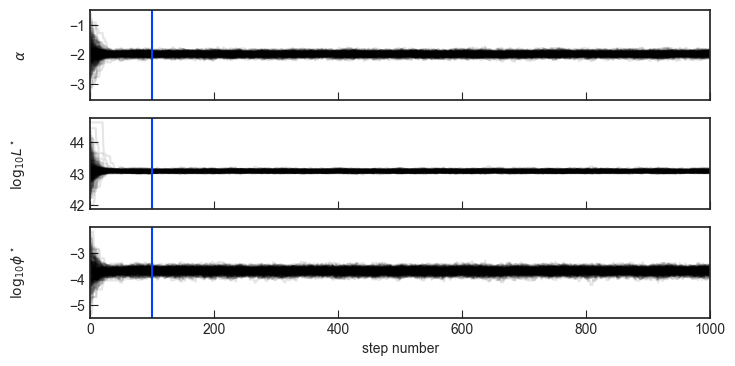

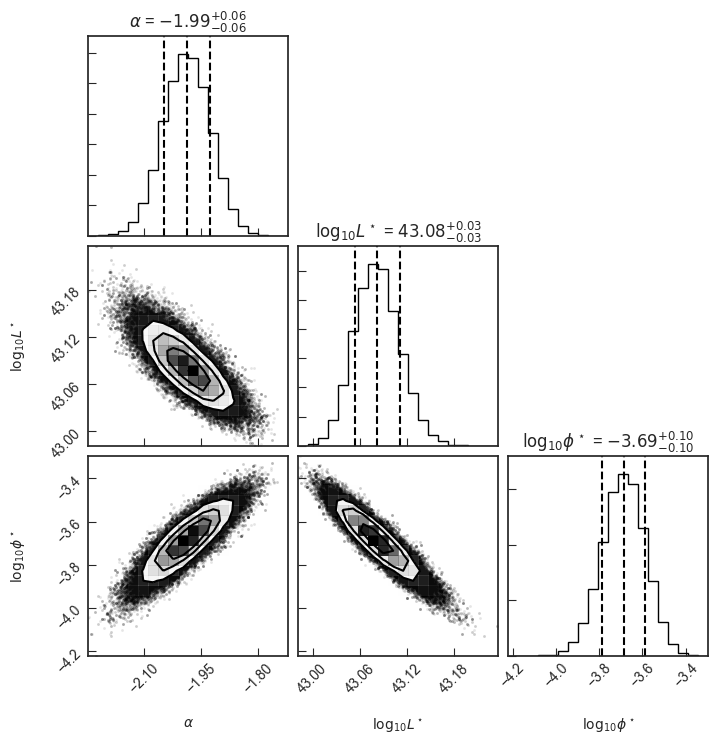

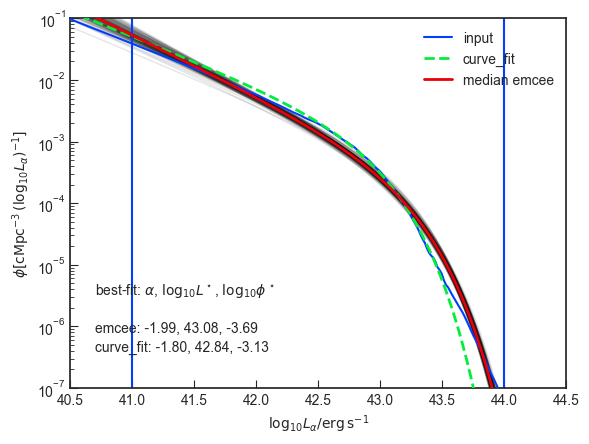

In [30]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=44., plot=True)


## 42.5 - 44

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 88.38it/s]


array([-3.0416482 , 43.34972144, -4.52335219])

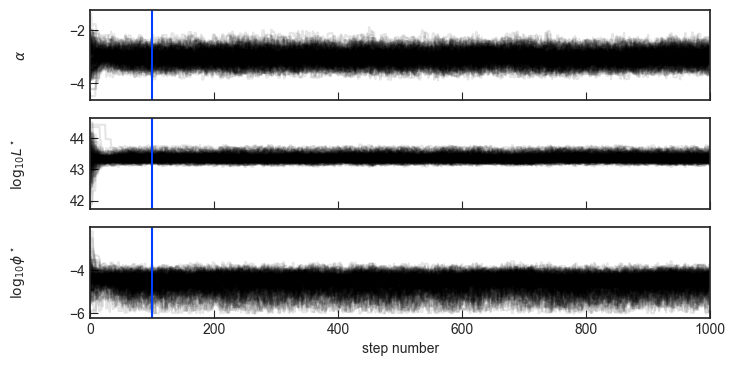

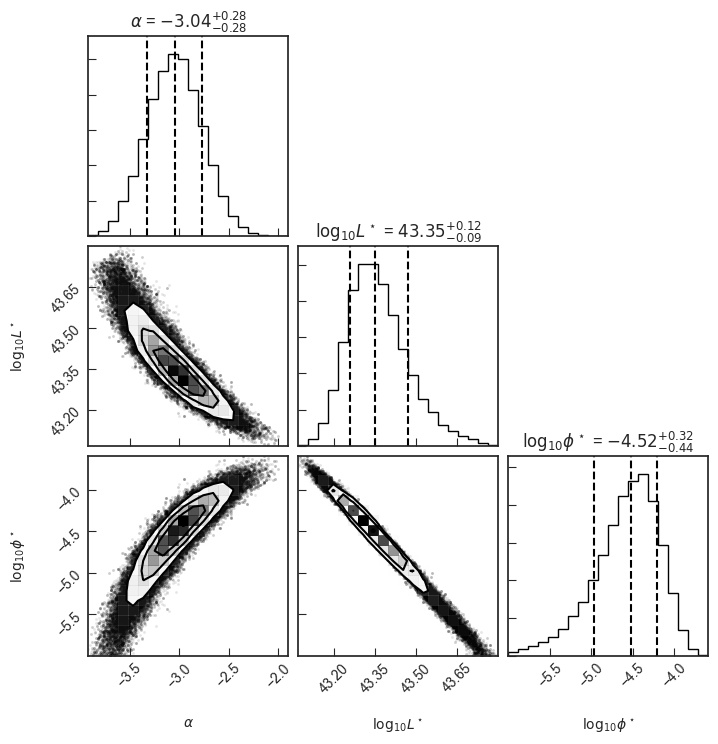

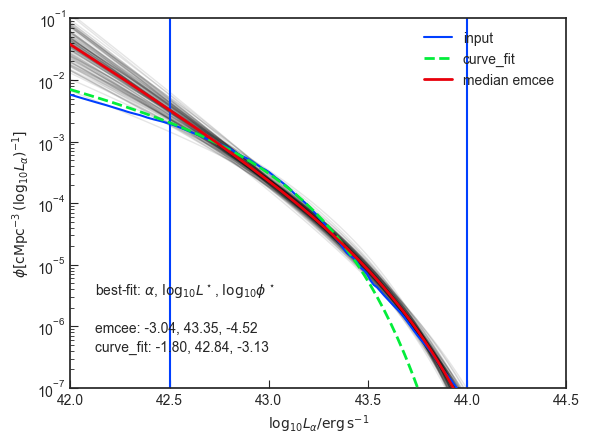

In [31]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=42.5, logL_max=44., plot=True)

## 40 - 44

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:14<00:00, 70.11it/s]


array([-1.88102747, 43.05009572, -3.57425934])

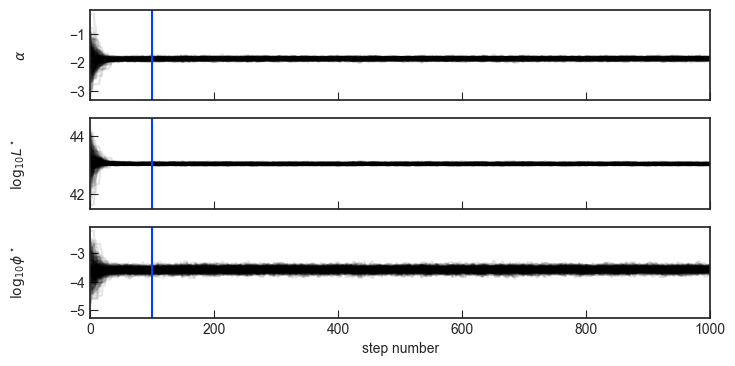

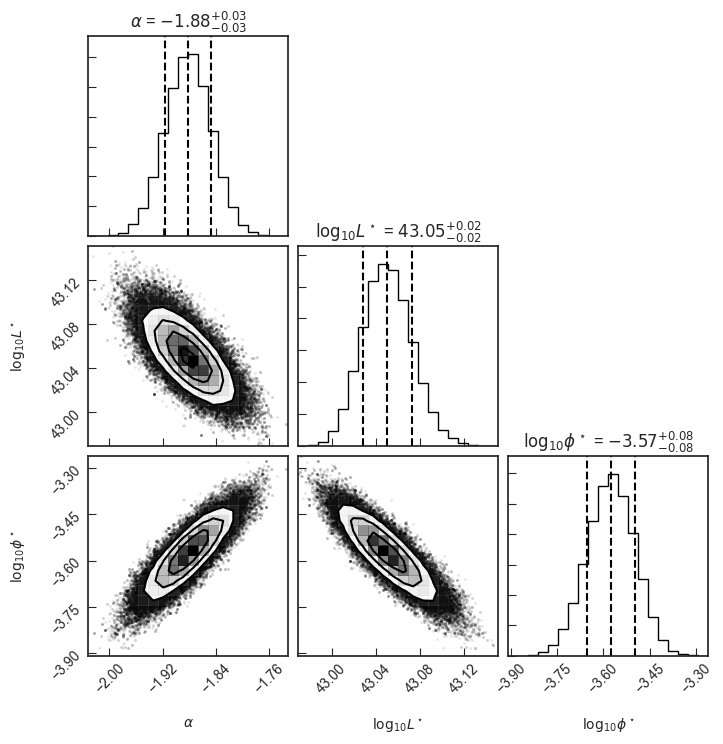

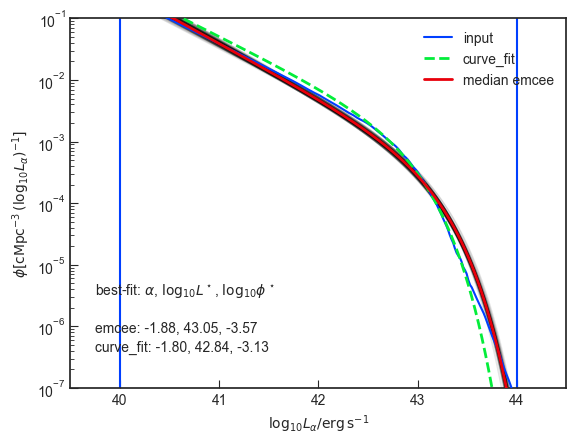

In [32]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=40., logL_max=44., plot=True)

## 41-43.5

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:17<00:00, 55.92it/s]


array([-1.74282048, 42.84413277, -3.15123403])

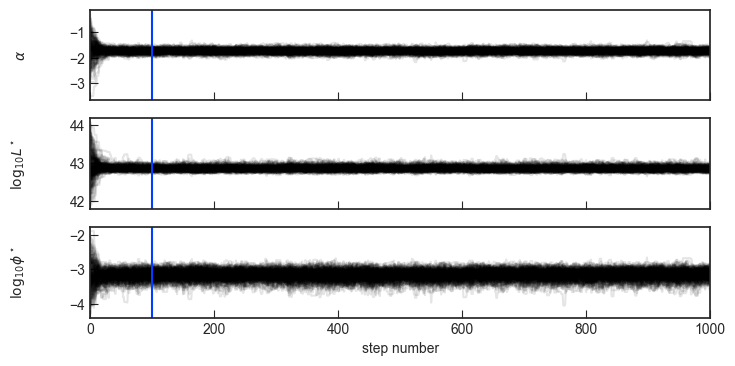

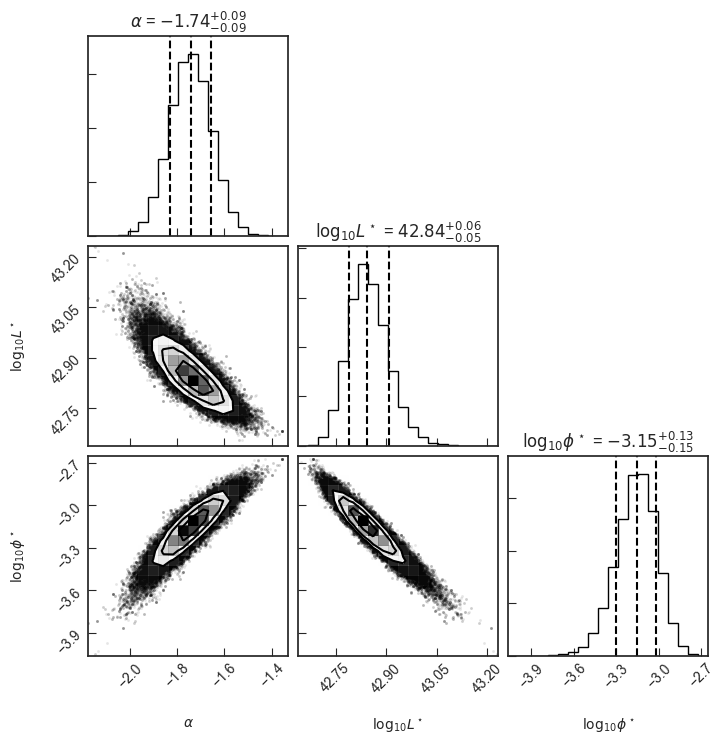

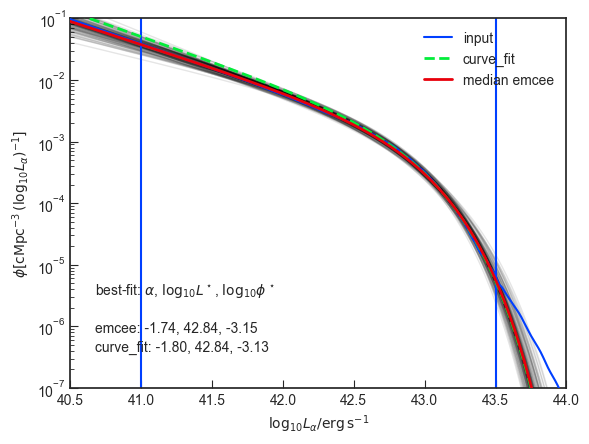

In [39]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=43.5, plot=True)



## 41 - 43.5 (using 0.1 errors on model)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 87.09it/s]


array([-1.85534025, 42.95895385, -3.39332872])

<Figure size 640x480 with 0 Axes>

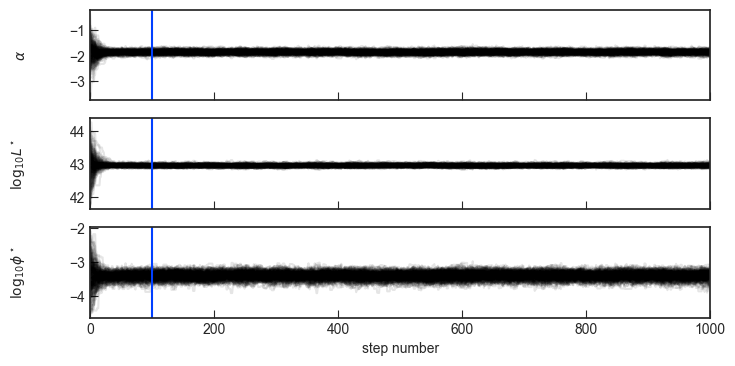

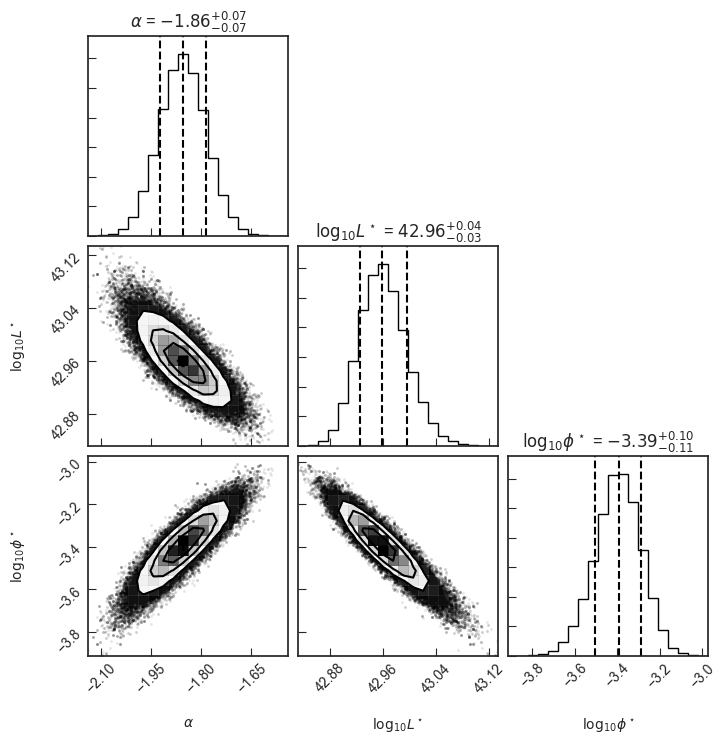

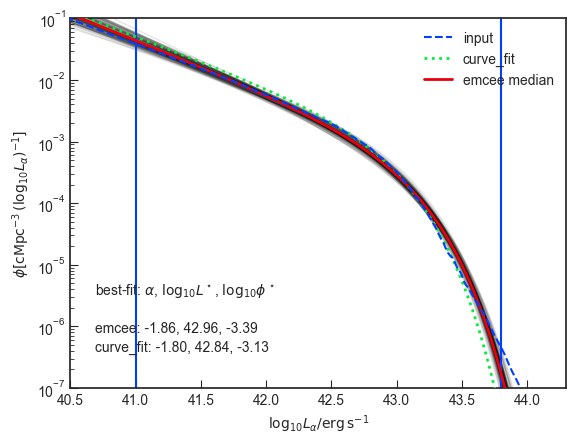

In [83]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=43.8, plot=True, plot_chains=True)


## 41-43

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:24<00:00, 41.15it/s]


array([-1.83567043, 43.12841526, -3.53954488])

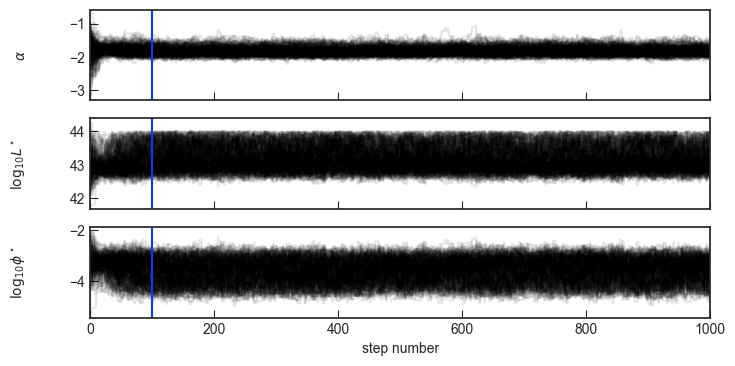

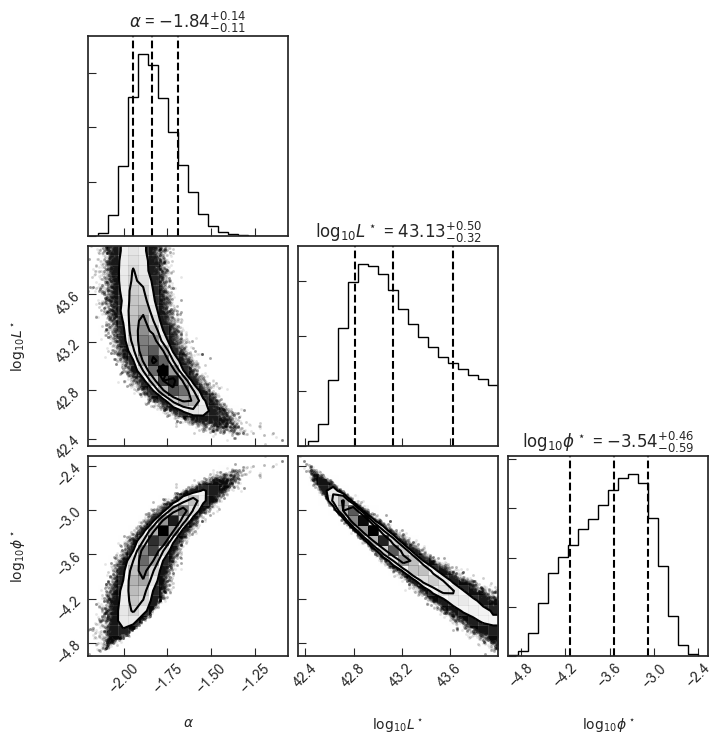

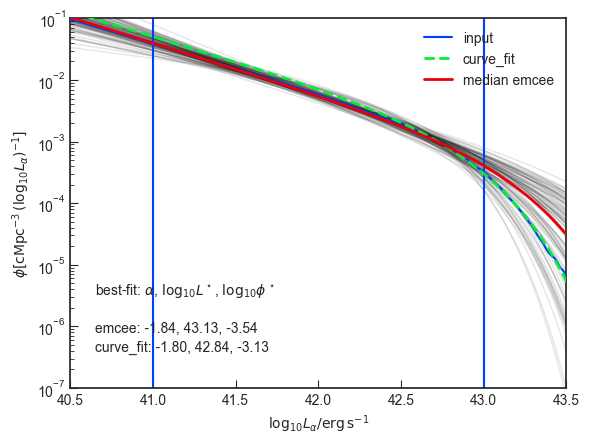

In [38]:
schechter_fit(zval_test=5.7, xHI_test=0.01, logL_min=41., logL_max=43., plot=True)


# z=10

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 88.81it/s]


array([-2.48668829, 43.01501129, -4.93433343])

<Figure size 640x480 with 0 Axes>

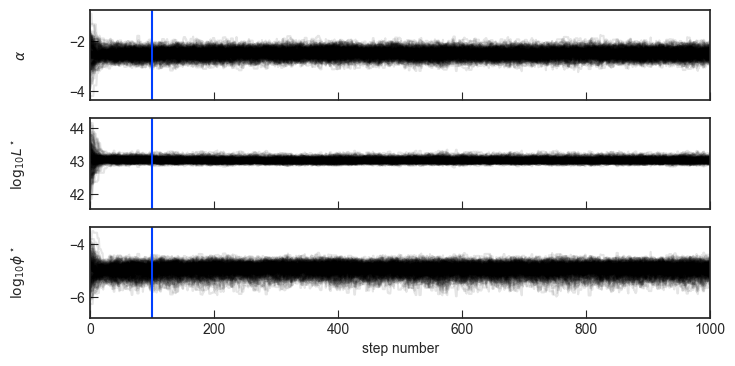

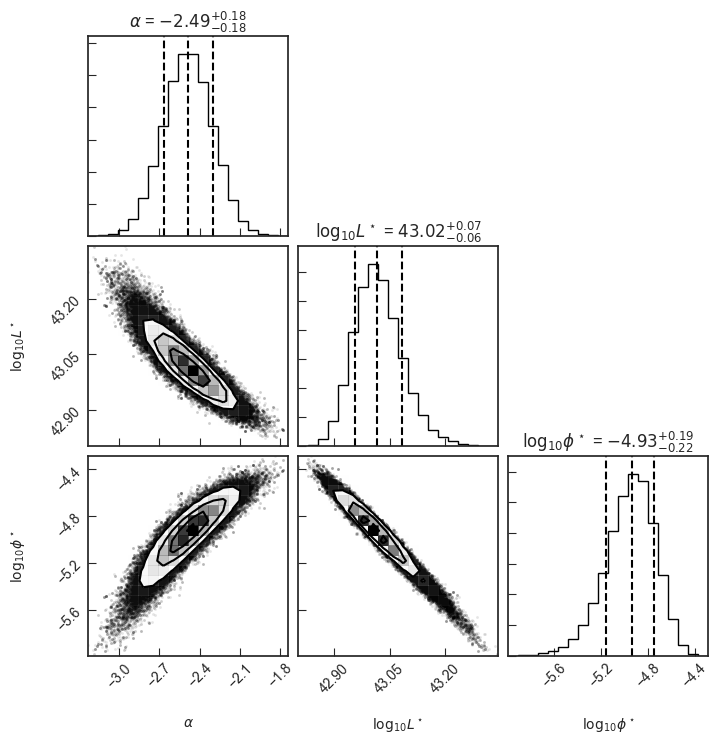

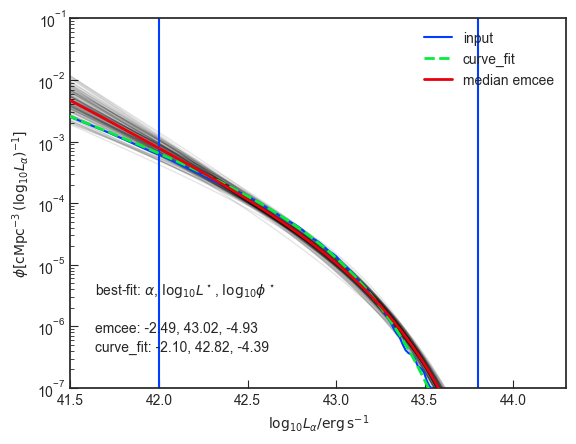

In [69]:
schechter_fit(zval_test=10., xHI_test=0.01, logL_min=42., logL_max=43.8, plot=True, plot_chains=True)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:10<00:00, 91.15it/s]


array([-3.1153579 , 43.11005275, -6.92718039])

<Figure size 640x480 with 0 Axes>

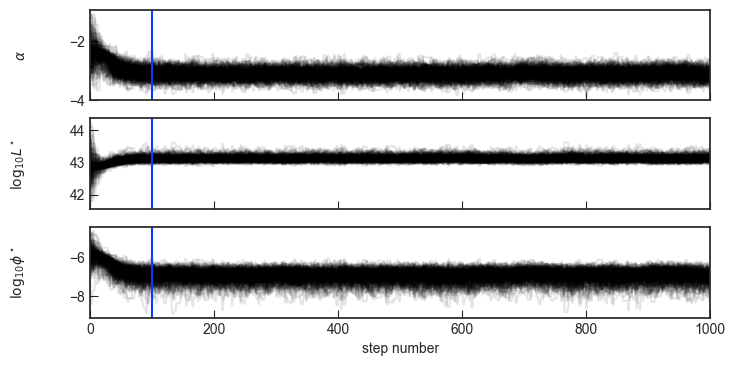

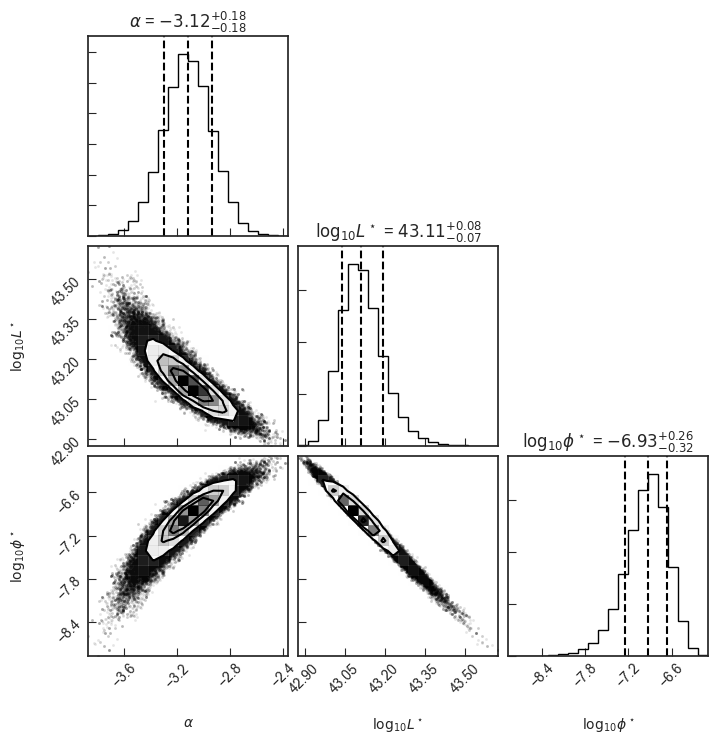

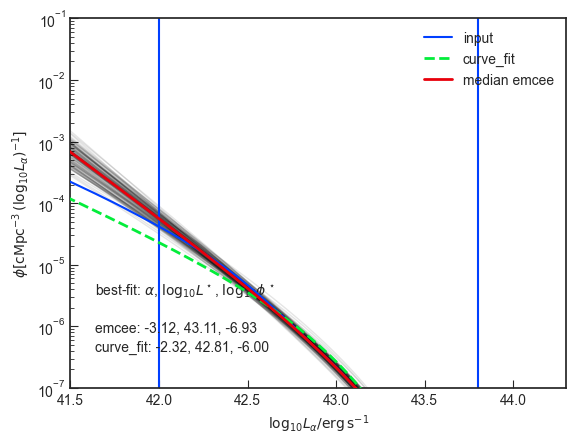

In [71]:
schechter_fit(zval_test=10., xHI_test=0.95, logL_min=42., logL_max=43.8, plot=True, plot_chains=True)

# Fake LF

In [33]:
def test_fit(params_true = [-2., 43., -3]):
    # log L grid
    logL = np.linspace(41, 44)

    # generate the LF from these parameters
    logL_LF = fs.schechter_logL(logL, *params_true)

    sampler = fs.fit_schechter_emcee(logL, logL_LF, logL_min=42.5, logL_max=44.)
    
    fs.plot_emcee(sampler, truths=params_true)
    
    plt.figure()
    fs.plot_emcee_draws(sampler, logL, logL_LF)
    
    del sampler

(38.0, 44.5)

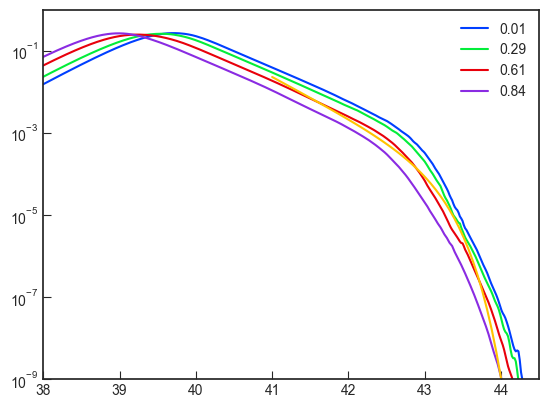

In [36]:
params_true = [-2., 43., -4]
logL = np.linspace(41, 44)
logL_LF = fs.schechter_logL(logL, *params_true)

for x in xHI[::10]:
    plt.semilogy(LF.log10_lg, LFdict[(z[2],x)], label=x)

plt.semilogy(logL, logL_LF)

plt.legend()
plt.ylim(1e-9,1)
plt.xlim(38., 44.5)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:10<00:00, 95.53it/s]


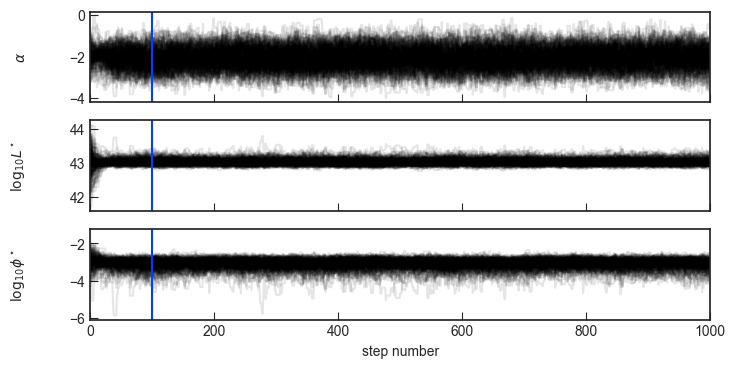

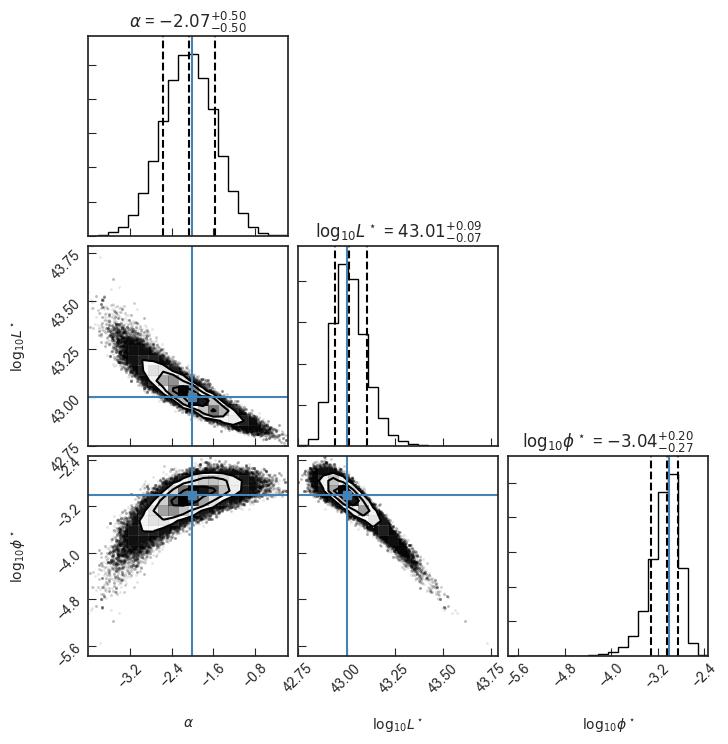

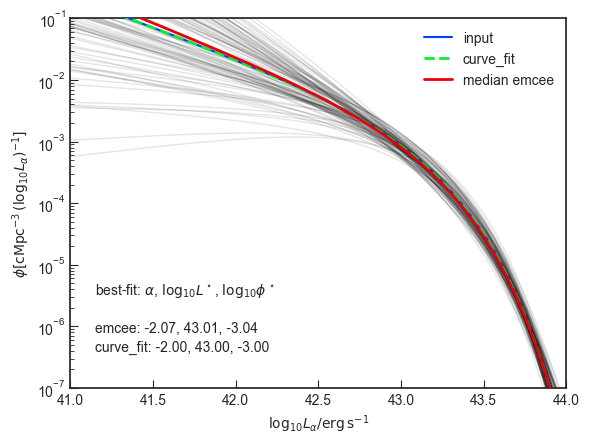

In [34]:
test_fit(params_true = [-2., 43., -3])

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:10<00:00, 98.99it/s]


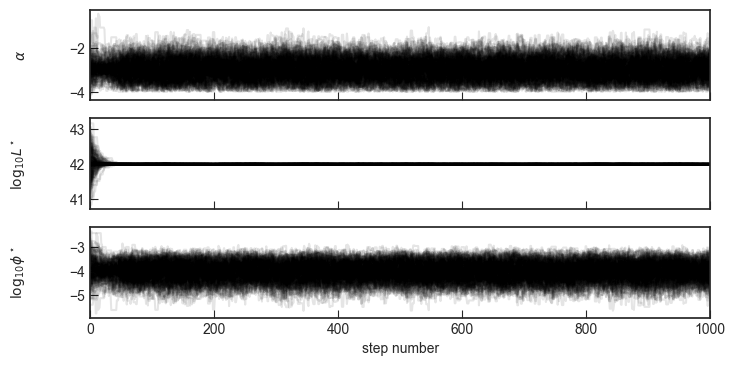

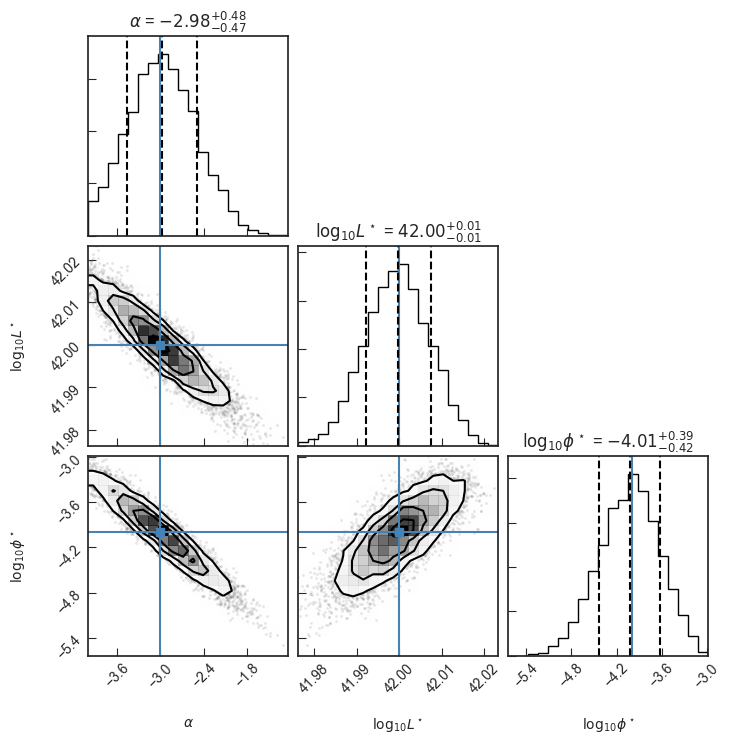

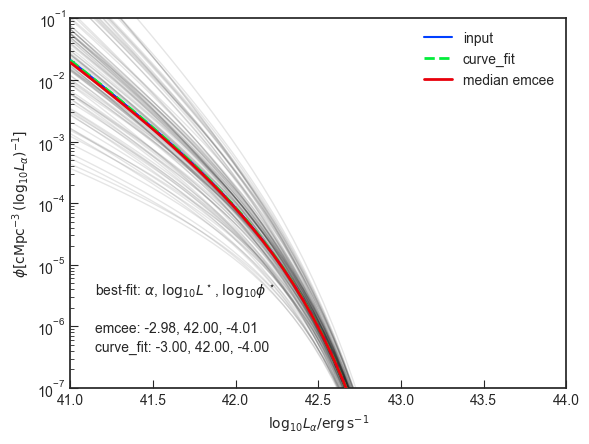

In [20]:
test_fit(params_true = [-3., 42., -4])

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/cmason/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:11<00:00, 86.79it/s]


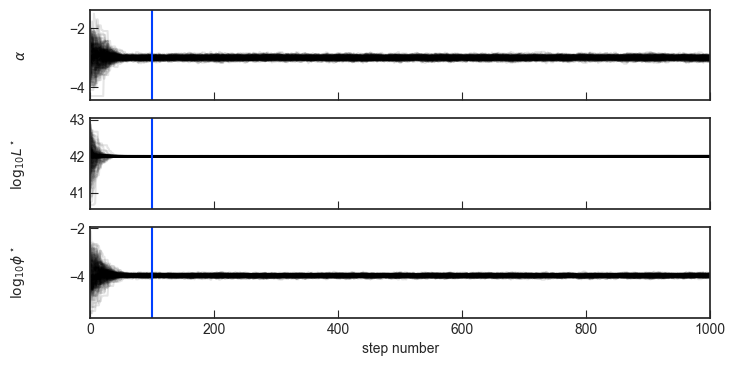

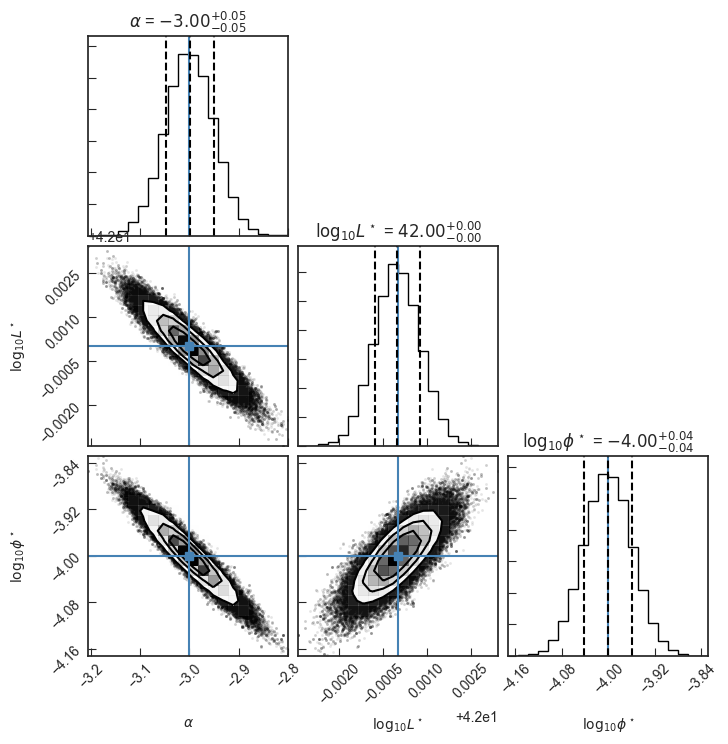

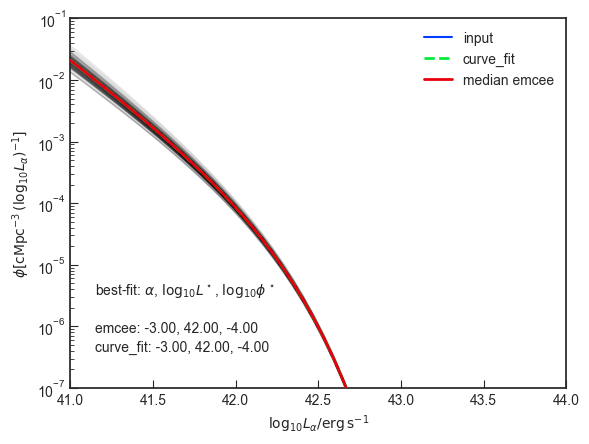

In [49]:
test_fit(params_true = [-3., 42., -4])